In [1]:
from google.colab import files
uploaded = files.upload()

Saving best_model_GA_val.loss_0.0422_val.acc_0.9896.h5 to best_model_GA_val.loss_0.0422_val.acc_0.9896.h5


In [2]:
from google.colab import files
uploaded = files.upload()

Saving GAmodel95%.h5 to GAmodel95%.h5


In [3]:
from google.colab import files
uploaded = files.upload()

Saving Проверка.zip to Проверка.zip


In [7]:
from google.colab import files
uploaded = files.upload()

Saving best_weights_GA_val.loss_0.0422_val.acc_0.9896.h5 to best_weights_GA_val.loss_0.0422_val.acc_0.9896.h5


In [4]:
!unzip -qo "Проверка.zip" -d /content/

In [5]:
from tensorflow import keras
# Загрузим сохраненную модель
model1 = keras.models.load_model("GAmodel95%.h5")
model1.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_107 (Conv2D)         (None, 53, 118, 46)       1288      
                                                                 
 max_pooling2d_89 (MaxPoolin  (None, 26, 59, 46)       0         
 g2D)                                                            
                                                                 
 conv2d_108 (Conv2D)         (None, 24, 57, 46)        19090     
                                                                 
 max_pooling2d_90 (MaxPoolin  (None, 12, 28, 46)       0         
 g2D)                                                            
                                                                 
 conv2d_109 (Conv2D)         (None, 10, 26, 46)        19090     
                                                                 
 max_pooling2d_91 (MaxPoolin  (None, 5, 13, 46)      

In [8]:
model2 = keras.models.load_model("best_model_GA_val.loss_0.0422_val.acc_0.9896.h5")
model2.load_weights('best_weights_GA_val.loss_0.0422_val.acc_0.9896.h5')
model2.summary()

Model: "sequential_83"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_148 (Conv2D)         (None, 178, 124, 43)      3268      
                                                                 
 max_pooling2d_148 (MaxPooli  (None, 89, 62, 43)       0         
 ng2D)                                                           
                                                                 
 conv2d_149 (Conv2D)         (None, 85, 58, 43)        46268     
                                                                 
 max_pooling2d_149 (MaxPooli  (None, 42, 29, 43)       0         
 ng2D)                                                           
                                                                 
 conv2d_150 (Conv2D)         (None, 38, 25, 43)        46268     
                                                                 
 max_pooling2d_150 (MaxPooli  (None, 19, 12, 43)     

1/1 [==============================] - 0s 121ms/step


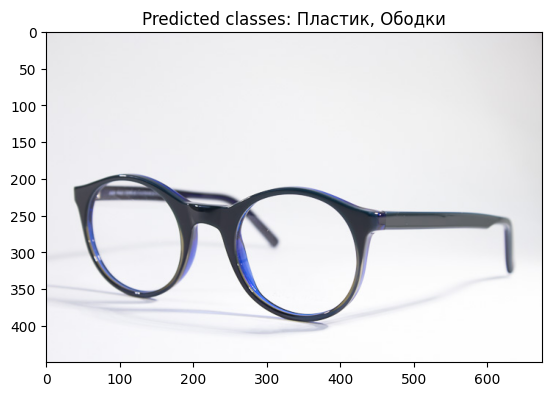

1/1 [==============================] - 0s 45ms/step


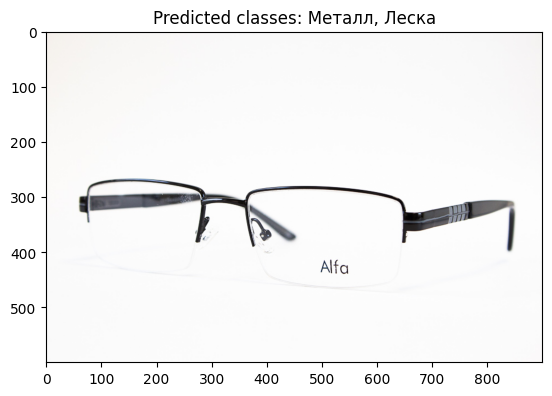

1/1 [==============================] - 0s 45ms/step


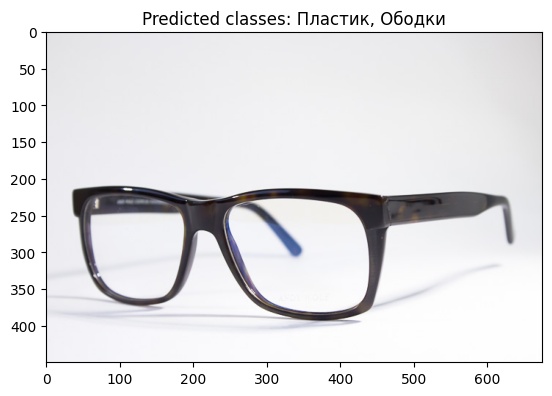

1/1 [==============================] - 0s 54ms/step


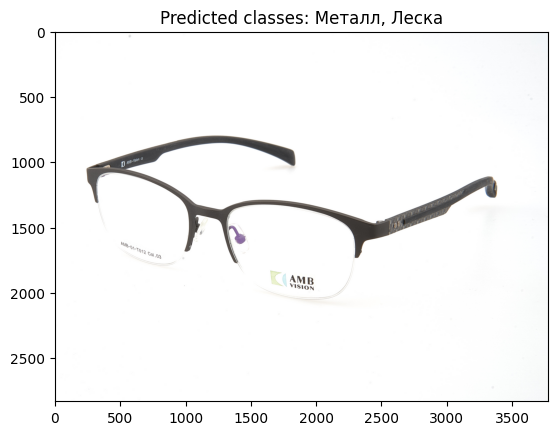

1/1 [==============================] - 0s 46ms/step


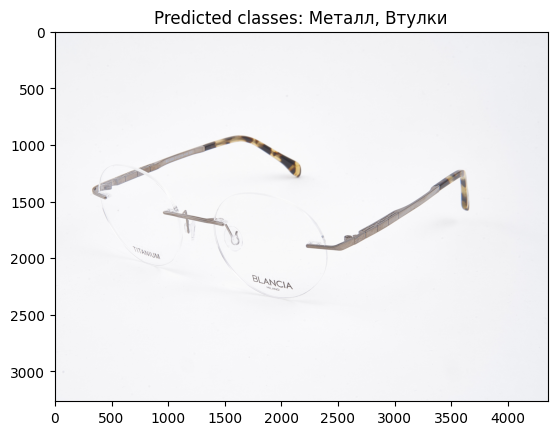

1/1 [==============================] - 0s 93ms/step


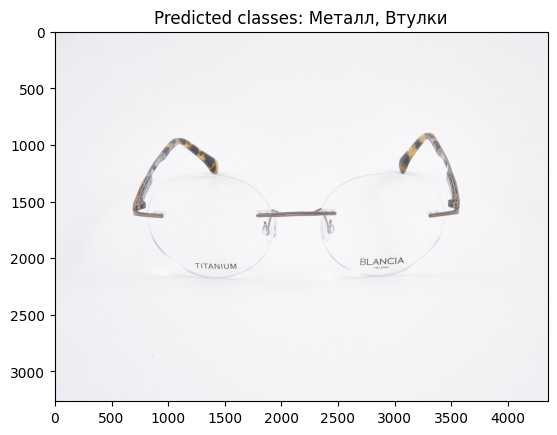

1/1 [==============================] - 0s 63ms/step


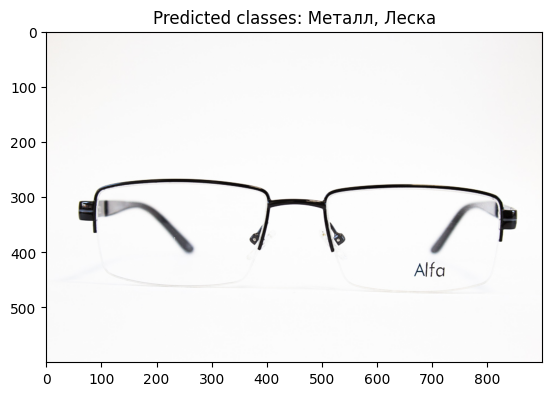

1/1 [==============================] - 0s 92ms/step


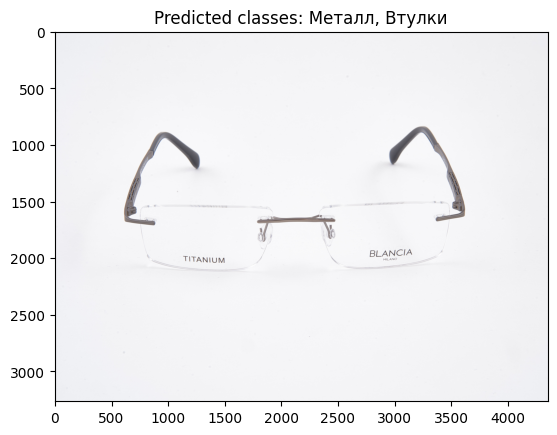

1/1 [==============================] - 0s 44ms/step


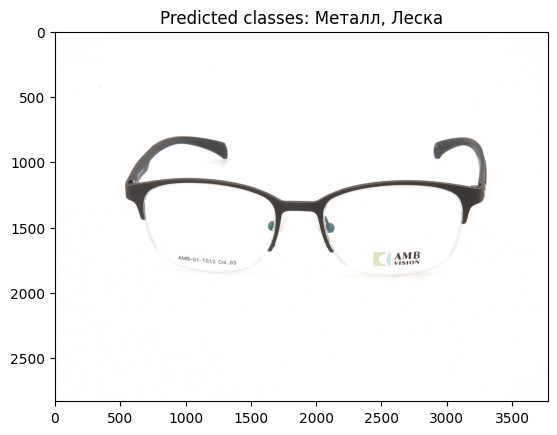

1/1 [==============================] - 0s 42ms/step


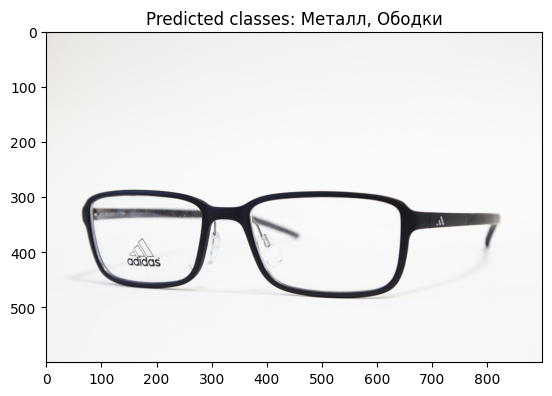

In [10]:
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
source_path = './Проверка'  # Путь к общей папке с датасетом

def load_and_predict_images(source_path, model1, model2):
    classes1 = ['Металл', 'Пластик']
    classes2 = ['Втулки', 'Леска', 'Ободки']
    images = [filename for filename in os.listdir(source_path) if filename.endswith(".jpg") or filename.endswith('.png')]
    for img_name in random.sample(images, 10):  # Take 3 random images
        img_path = os.path.join(source_path, img_name)
        img = Image.open(img_path)

        # Resize image to target size
        img_resized = img.resize((600, 600))

        # Crop the image
        cropped_image1 = img_resized.crop((40, 160, 560, 410))
        # Resize image for prediction
        img_resized1 = cropped_image1.resize((120, 55))  # resize images if necessary
        img_resized2 = img_resized.resize((128, 182))
        img_np1 = np.array(img_resized1)
        img_np2 = np.array(img_resized2)
        img_np1 = img_np1[np.newaxis, ...]
        img_np2 = img_np2[np.newaxis, ...]  # Add an extra dimension for the batch size
        prediction1 = model1.predict(img_np1)
        prediction2 = model2.predict(img_np2)
        predicted_class1 = classes1[np.argmax(prediction1)]
        predicted_class2 = classes2[np.argmax(prediction2)]
        # Display the original image and the prediction
        plt.imshow(img)
        plt.title(f'Predicted classes: {predicted_class1}, {predicted_class2}')
        plt.show()

load_and_predict_images(source_path, model1, model2)